In [1]:
#Libraries used
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
#.book for getting frequency distribution of words
from nltk.book import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Intel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
#Reading the positive train reviews
pos_rev_text = []
dir = "C:/Users/Intel/Desktop/New folder/aclImdb/train/pos"
for file in os.listdir( dir ):
    with open( os.path.join( dir, file ) ,"r",encoding="utf8") as fd:
        pos_rev_text.append(fd.read())
pos_rev_train = pd.DataFrame(columns=['label','review'])
pos_rev_train['review'] = pos_rev_text.copy()
pos_rev_train['label'] = 1
pos_rev_train.head()

,label,review
0,1,Bromwell High is a cartoon comedy. It ran at t...
1,1,Homelessness (or Houselessness as George Carli...
2,1,Brilliant over-acting by Lesley Ann Warren. Be...
3,1,This is easily the most underrated film inn th...
4,1,This is not the typical Mel Brooks film. It wa...


In [10]:
#Reading negative train reviews
neg_rev_text = []
dir = "C:/Users/Intel/Desktop/New folder/aclImdb/train/pos"
for file in os.listdir( dir ):
    with open( os.path.join( dir, file ) ,"r",encoding="utf8") as fd:
        neg_rev_text.append(fd.read())
neg_rev_train = pd.DataFrame(columns=['label','review'])
neg_rev_train['review'] = neg_rev_text.copy()
neg_rev_train['label'] = 0
neg_rev_train.head()

,label,review
0,0,Bromwell High is a cartoon comedy. It ran at t...
1,0,Homelessness (or Houselessness as George Carli...
2,0,Brilliant over-acting by Lesley Ann Warren. Be...
3,0,This is easily the most underrated film inn th...
4,0,This is not the typical Mel Brooks film. It wa...


In [11]:
#Forming the complete train dataframe
sup_train = pos_rev_train.append(neg_rev_train)
sup_train.reset_index().drop('index',axis=1)
sup_train = sup_train.sample(frac=1).reset_index(drop=True)
sup_train.head()

,label,review
0,1,Coming shortly before the imposition of a mora...
1,1,This project was originally conceived as the m...
2,0,"What can I say, it's a damn good movie. See it..."
3,1,I saw the long day's dying when it first came ...
4,0,Of course if you are reading my review you hav...


In [12]:
#Reading positive test reviews
pos_rev_text = []
dir = "C:/Users/Intel/Desktop/New folder/aclImdb/test/pos"
for file in os.listdir( dir ):
    with open( os.path.join( dir, file ) ,"r",encoding="utf8") as fd:
        pos_rev_text.append(fd.read())
pos_rev_test = pd.DataFrame(columns=['label','review'])
pos_rev_test['review'] = pos_rev_text.copy()
pos_rev_test['label'] = 1
pos_rev_test.head()

,label,review
0,1,I went and saw this movie last night after bei...
1,1,Actor turned director Bill Paxton follows up h...
2,1,As a recreational golfer with some knowledge o...
3,1,"I saw this film in a sneak preview, and it is ..."
4,1,Bill Paxton has taken the true story of the 19...


In [13]:
#Reading negative test reviews
neg_rev_text = []
dir = "C:/Users/Intel/Desktop/New folder/aclImdb/test/pos"
for file in os.listdir( dir ):
    with open( os.path.join( dir, file ) ,"r",encoding="utf8") as fd:
        neg_rev_text.append(fd.read())
neg_rev_test = pd.DataFrame(columns=['label','review'])
neg_rev_test['review'] = neg_rev_text.copy()
neg_rev_test['label'] = 0
neg_rev_test.head()

,label,review
0,0,I went and saw this movie last night after bei...
1,0,Actor turned director Bill Paxton follows up h...
2,0,As a recreational golfer with some knowledge o...
3,0,"I saw this film in a sneak preview, and it is ..."
4,0,Bill Paxton has taken the true story of the 19...


In [14]:
#Forming the complete test dataframe
sup_test = pos_rev_test.append(neg_rev_test)
sup_test.reset_index().drop('index',axis=1)
sup_test = sup_test.sample(frac=1).reset_index(drop=True)
sup_test.head()

,label,review
0,0,WARNING: MAY contain some minor spoilers.<br /...
1,0,Fantastic documentary. A movie within a movie....
2,1,One of the best western movies ever made. Unfo...
3,1,I've seen Riverdance in person and nothing com...
4,1,The Ghost Walks is a nifty little mystery with...


In [16]:
#Overall reviews dataframe including train and test
sup = sup_train.merge(sup_test,how='outer')
sup.head()

,label,review
0,1,Coming shortly before the imposition of a mora...
1,1,This project was originally conceived as the m...
2,0,"What can I say, it's a damn good movie. See it..."
3,1,I saw the long day's dying when it first came ...
4,0,Of course if you are reading my review you hav...


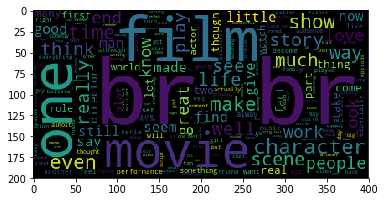

In [17]:
#Wordcloud before cleaning html tags,punctuations and stopwords
wc = WordCloud()

review = sup['review'].unique().tolist()
review = ' '.join(review)
rev_cld = wc.generate(review)

plt.figure()
plt.imshow(rev_cld)
plt.show()

In [18]:
#Removing the HTML tags

sup_train.review=sup_train.review.str.replace('<br />','')
sup_test.review=sup_test.review.str.replace('<br />','')

In [20]:
ps = PorterStemmer()
#Removing punctuations and stopwords
sup_train.review = sup_train.review.str.lower().str.replace('[^a-z]', ' ').str.split()
sup_train.review = sup_train.review.apply(lambda x : ' '.join([ps.stem(word) for word in x if word not in set(stopwords.words('english'))]))
sup_train.head()
#sup_train.to_csv('sup_train.csv',index=False)

,label,review
0,1,come shortli imposit moral code darken spirit ...
1,1,project origin conceiv movi version popular ja...
2,0,say damn good movi see still great camera work...
3,1,saw long day die first came cinema thought fil...
4,0,cours read review seen film alreadi raja babu ...


In [21]:
sup_test.review = sup_test.review.str.lower().str.replace('[^a-z]', ' ').str.split()
sup_test.review = sup_test.review.apply(lambda x : ' '.join([ps.stem(word) for word in x if word not in set(stopwords.words('english'))]))
sup_test.head()
#sup_test.to_csv('sup_test.csv',index=False)

,label,review
0,0,warn may contain minor spoiler hard say anyth ...
1,0,fantast documentari movi within movi glad bloc...
2,1,one best western movi ever made unfortun never...
3,1,seen riverd person noth compar video show awes...
4,1,ghost walk nifti littl mysteri great twist sna...


In [4]:
#Post cleaning
sup = sup_train.merge(sup_test,how='outer')

In [5]:
#Discover the lowest frequency and highest frequency(most common) words in review
fdist = FreqDist(' '.join(sup.review).split())
print('Top 10 Highest freq words:',fdist.most_common(10))
print('\n')
print('Top 10 Lowest freq words:',fdist.most_common()[-10:-1])

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
Top 10 Highest freq words: [('film', 101696), ('movi', 89536), ('one', 56508), ('like', 41076), ('time', 33220), ('good', 30472), ('see', 30240), ('stori', 28344), ('charact', 28016), ('make', 27606)]


Top 10 Lowest freq words: [('etrang', 2), ('troob', 2), ('dogcatch', 2), ('bellushi', 2), ('darkwav', 2), ('hillin', 2), ('moviehunt', 2), ('listend', 2), ('absurdest', 2)]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

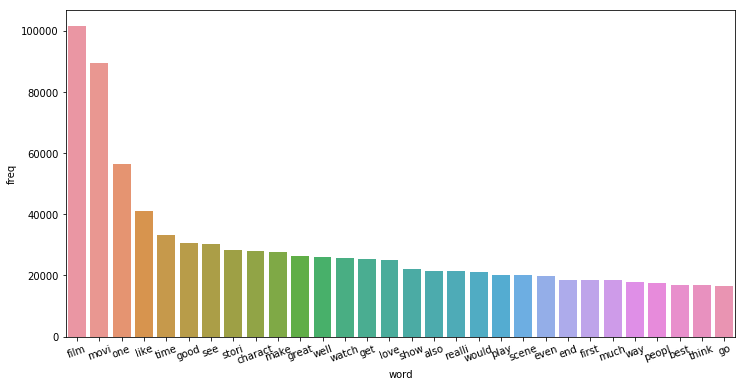

In [19]:
#Distribution of most frequent words
top_freq = pd.DataFrame(fdist.most_common(30))
top_freq.columns = ['word','freq']
plt.figure(figsize=(12,6))
sns.barplot(x='word',y='freq',data=top_freq)
plt.xticks(rotation=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

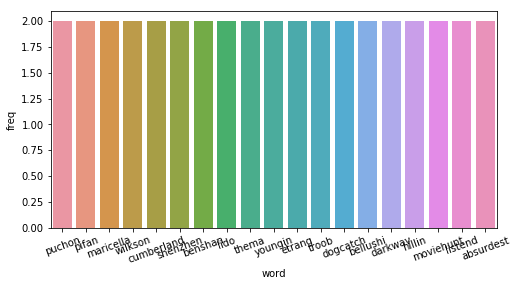

In [27]:
#Distribution of least frequent words
bottom_freq = pd.DataFrame(fdist.most_common()[-20:-1])
bottom_freq.columns = ['word','freq']
plt.figure(figsize=(8,4))
sns.barplot(x='word',y='freq',data=bottom_freq)
plt.xticks(rotation=20)

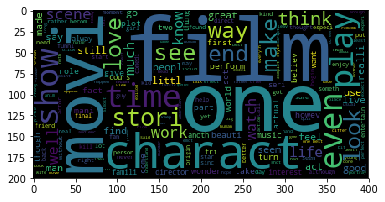

In [18]:
#Positive class wordcloud after cleaning 
wc = WordCloud()

review = sup[sup['label'] == 1].review.unique().tolist()
review = ' '.join(review)
rev_cld = wc.generate(review)

plt.figure()
plt.imshow(rev_cld)
plt.show()

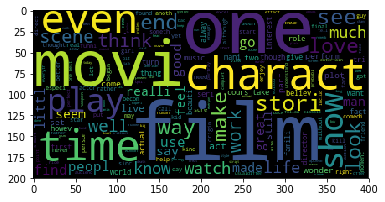

In [19]:
#Negative class wordcloud after cleaning
wc = WordCloud()

review = sup[sup['label'] == 0].review.unique().tolist()
review = ' '.join(review)
rev_cld = wc.generate(review)

plt.figure()
plt.imshow(rev_cld)
plt.show()

In [23]:
#Reading from the stored csv files after cleaning
sup_train = pd.read_csv('sup_train.csv')
sup_test = pd.read_csv('sup_test.csv')

In [4]:
#Concatinated them initially to get equal no.of features in both train and test. Then separated the two based on row indices.
sup = pd.concat([sup_train,sup_test],ignore_index=True)

In [5]:
y = sup['label'].values
cv = CountVectorizer()
X  = cv.fit_transform(sup.review).toarray()

In [6]:
y_train = sup_train['label'].values
y_test = sup_test['label'].values

In [7]:
#Feature Selection
tree_clf = ExtraTreesClassifier()
tree_clf.fit(X, y)
importances = tree_clf.feature_importances_
feature_names = cv.get_feature_names()
feature_imp_dict = dict(zip(feature_names, importances))
sorted_features = sorted(feature_imp_dict.items(), key=lambda x:x[1], reverse=True)
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(tree_clf,prefit=True)
X_updated = model.transform(X)
print('Total train features count', X.shape[1])
print('Selected train features', X_updated.shape[1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Total train features count 47677
Selected train features 10455


(0, 0.001)

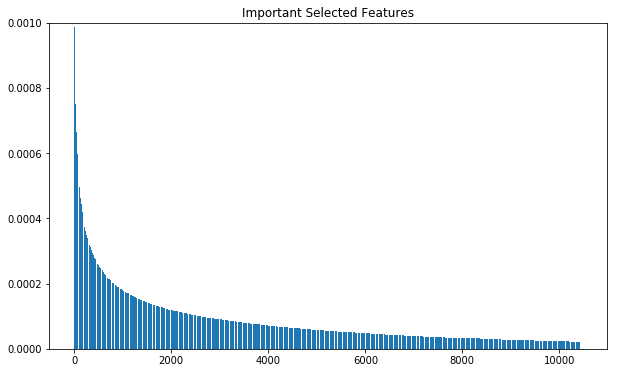

In [26]:
plt.figure(figsize=(10,6))
plt.bar(range(X_updated.shape[1]),[imp[1] for imp in sorted_features[:X_updated.shape[1]]])
plt.title('Important Selected Features')
plt.ylim(0,0.001)

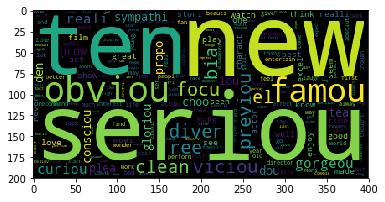

In [36]:
#Wordcloud after Feature Selection
wc = WordCloud()
selected_feat = [x[0] for x in sorted_features[:X_updated.shape[1]]]
selected_feat= ' '.join(selected_feat)
rev_cld = wc.generate(selected_feat)
plt.figure()
plt.imshow(rev_cld)
plt.show()

In [10]:
#Splitting based on row indices after feature selection. 
#This way we can get equal no of features in train and test dataset
X_train = X_updated[:25000]
X_test = X_updated[25000:]

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
lr_pred = logreg.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, lr_pred)) 

             precision    recall  f1-score   support

          0       0.51      0.51      0.51      7548
          1       0.50      0.50      0.50      7452

avg / total       0.51      0.51      0.51     15000



# Naive Bayes

In [11]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
pred_nb = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_nb))

             precision    recall  f1-score   support

          0       0.51      0.51      0.51      7548
          1       0.51      0.51      0.51      7452

avg / total       0.51      0.51      0.51     15000



# SVM

In [13]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,y_train)
pred_svm = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_svm))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00      7548
          1       0.50      1.00      0.66      7452

avg / total       0.25      0.50      0.33     15000



In [ ]:
#Naive Bayes is the best model out of the three

# Unsupervised

In [2]:
#Reading data from unsup folder
rev=[]
dir = "C:/Users/Intel/Desktop/New folder/aclImdb/train/unsup/"
for file in os.listdir( dir ):
    with open( os.path.join( dir, file ) ,"r",encoding="utf8") as fd:
        rev.append(fd.read())
unsup = pd.DataFrame(columns=['review'])
unsup['review'] = rev

In [3]:
unsup.review = unsup.review.str.replace('<br />','')
unsup.review = unsup.review.str.lower().str.replace('[^a-z]', ' ').str.split()

In [4]:
ps=PorterStemmer()
unsup.review = unsup.review.apply(lambda x: ' '.join([ps.stem(word) for word in x if word not in set(stopwords.words('english'))]))

#Making a new csv file after cleaning
unsup.to_csv('unsup.csv',index=False)

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
#Reading from the cleaned csv file
unsup = pd.read_csv('unsup.csv')
unsup.head()

,review
0,admit great major film releas say dozen major ...
1,take low budget inexperienc actor doubl produc...
2,everybodi seen back futur right whether like m...
3,dori day icon beauti sing act warm voic geniu ...
4,seri silli fun love movi big year dori day yea...


In [3]:
unsup_sample = unsup.sample(frac=1)

In [4]:
tfv = TfidfVectorizer(max_features=2500)
tfv.fit(unsup_sample.review)
X =  tfv.transform(unsup_sample.review)

In [5]:
svd = TruncatedSVD(n_components=2000)
svd.fit(X)
X_updated = svd.transform(X)

# Kmeans Clustering

Text(0.5,1,'KMeans Clusters')

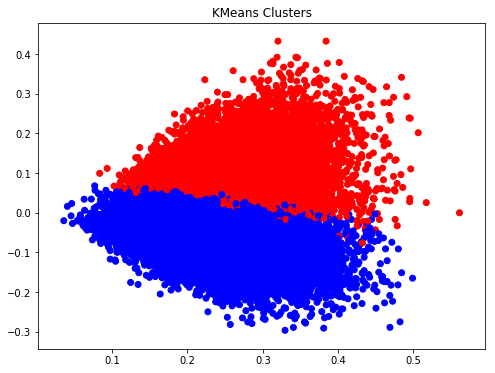

In [65]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2,random_state=0)
km.fit(X_updated)

colors = ['red','blue']
pred_colors = [colors[label] for label in km.labels_]
plt.figure(figsize=(8,6)) 
plt.scatter(X_updated[:,0],X_updated[:,1], c=pred_colors)
plt.title('KMeans Clusters')

# Hierarchical Clustering

Text(0.5,1,'Hierarchical Clustering')

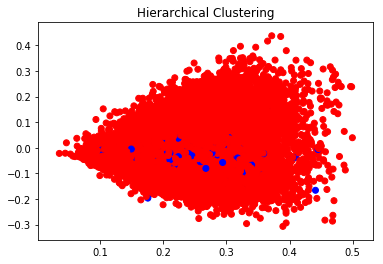

In [6]:
from sklearn.cluster import AgglomerativeClustering
ward=AgglomerativeClustering(n_clusters=2,linkage='ward')
ward.fit(X_updated)
colors = ['red','blue']
pred_colors = [colors[label] for label in ward.labels_]
plt.scatter(X_updated[:,0],X_updated[:,1],c=pred_colors)
plt.title('Hierarchical Clustering')

In [ ]:
#KMeans is the model that performed better.

# KMeans with 4 Clusters

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4,random_state=13,init='k-means++',max_iter=100)
kmeans.fit(X_updated)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=13, tol=0.0001, verbose=0)

In [19]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfv.get_feature_names()
for i in range(4):
    l=[]
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :]:
        l.append(terms[ind])
    print(l[100:200])

Top terms per cluster:
Cluster 0:
['belief', 'creativ', 'cover', 'creatur', 'bunch', 'bed', 'door', 'brian', 'boss', 'complic', 'extra', 'angl', 'bigger', 'britain', 'exploit', 'brought', 'aw', 'commerci', 'bite', 'favourit', 'help', 'final', 'embarrass', 'build', 'band', 'blend', 'concert', 'gang', 'appear', 'freak', 'format', 'content', 'dislik', 'convers', 'blockbust', 'demon', 'ex', 'hammer', 'captur', 'center', 'bell', 'explor', 'focu', 'motiv', 'bloodi', 'differ', 'asian', 'central', 'exact', 'decad', 'impact', 'benefit', 'dollar', 'button', 'bought', 'comparison', 'credibl', 'crack', 'gore', 'cheesi', 'brilliantli', 'check', 'blame', 'degre', 'citi', 'charg', 'convent', 'beyond', 'bright', 'compet', 'author', 'breast', 'drama', 'ear', 'deeper', 'funniest', 'cell', 'comput', 'featur', 'inde', 'chemistri', 'costum', 'audienc', 'divorc', 'crazi', 'describ', 'chill', 'classic', 'disguis', 'crew', 'bore', 'curiou', 'american', 'disney', 'giant', 'corni', 'associ', 'frankenstein', 'de

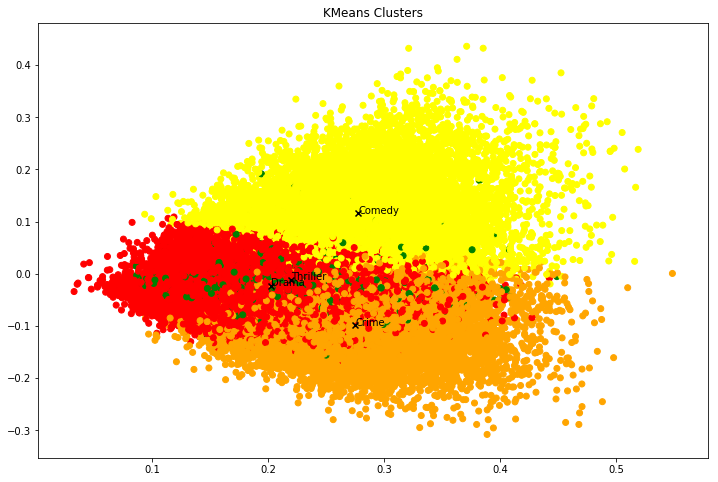

In [22]:
colors = ['red','orange','green','yellow']
pred_colors = [colors[label] for label in kmeans.labels_]
plt.figure(figsize=(12,8)) 
plt.scatter(X_updated[:,0],X_updated[:,1], c=pred_colors)
plt.title('KMeans Clusters')
centroids = kmeans.cluster_centers_
genre_labels = ['Drama','Crime','Thriller','Comedy']
plt.scatter(centroids[:,0],centroids[:,1], marker='x',c='black')
for i in range(len(genre_labels)):
    plt.annotate(xy=(centroids[:,0][i],centroids[:,1][i]),s=genre_labels[i])

# Active Clustering

In [27]:
sup_train = pd.read_csv('sup_train.csv')
sup_train.head()

,label,review
0,1,come shortli imposit moral code darken spirit ...
1,1,project origin conceiv movi version popular ja...
2,0,say damn good movi see still great camera work...
3,1,saw long day die first came cinema thought fil...
4,0,cours read review seen film alreadi raja babu ...


In [28]:
tfv = TfidfVectorizer(max_features=2500)
tfv.fit(sup_train.drop('label',axis=1).review)
X =  tfv.transform(sup_train.drop('label',axis=1).review)

In [29]:
svd = TruncatedSVD(n_components=2000)
svd.fit(X)
X_active = svd.transform(X)

In [64]:
from sklearn.cluster import KMeans
kmeans_active = KMeans(n_clusters = 4,random_state=42,init='k-means++',max_iter=100)
kmeans_active.fit(X_active)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [101]:
print("Top terms per cluster:")
order_centroids = kmeans_active.cluster_centers_.argsort()[:, ::-1]
terms = tfv.get_feature_names()
for i in range(4):
    l=[]
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :]:
        l.append(terms[ind])
    print(l[0:100])

Top terms per cluster:
Cluster 0:
['aaron', 'abil', 'absorb', 'accord', 'absolut', 'account', 'accomplish', 'act', 'actor', 'address', 'addit', 'afraid', 'alexand', 'admir', 'altern', 'apart', 'adventur', 'appar', 'amus', 'also', 'area', 'alic', 'alex', 'accid', 'anger', 'accompani', 'american', 'arrest', 'ador', 'albeit', 'activ', 'ambigu', 'ben', 'case', 'anim', 'basebal', 'appli', 'add', 'academi', 'anyway', 'alcohol', 'ahead', 'carl', 'age', 'air', 'attract', 'biggest', 'born', 'crook', 'creatur', 'ball', 'bound', 'ago', 'awkward', 'bob', 'caught', 'brillianc', 'cell', 'answer', 'among', 'batman', 'ass', 'death', 'africa', 'buy', 'billi', 'dracula', 'bu', 'attent', 'brown', 'apocalyps', 'brave', 'engin', 'boy', 'extend', 'arm', 'combat', 'anyth', 'belov', 'comput', 'ask', 'depict', 'clear', 'back', 'began', 'anthoni', 'assum', 'defeat', 'cute', 'commerci', 'citizen', 'confront', 'degre', 'aspect', 'accur', 'adapt', 'character', 'clark', 'block', 'bodi']
Cluster 1:
['aaron', 'abando

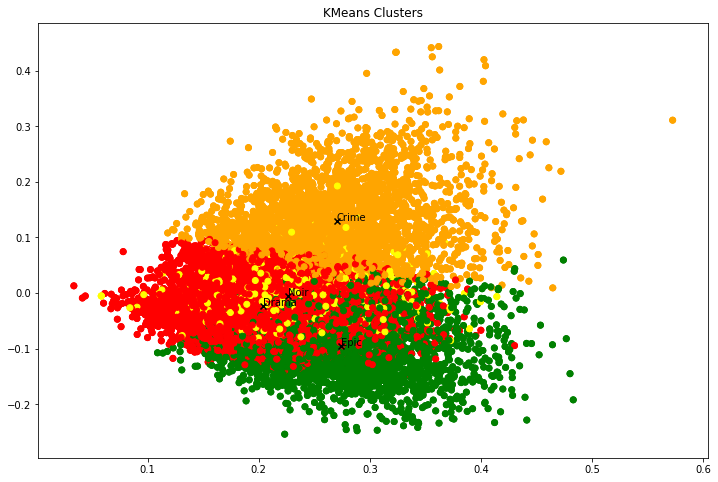

In [72]:
colors = ['red','orange','green','yellow']
pred_colors = [colors[label] for label in kmeans_active.labels_]
plt.figure(figsize=(12,8)) 
plt.scatter(X_active[:,0],X_active[:,1], c=pred_colors)
plt.title('KMeans Clusters')
centroids = kmeans_active.cluster_centers_
genre_labels = ['Drama','Crime','Epic','Noir']
plt.scatter(centroids[:,0],centroids[:,1], marker='x',c='black')
for i in range(len(genre_labels)):
    plt.annotate(xy=(centroids[:,0][i],centroids[:,1][i]),s=genre_labels[i])